<a href="https://colab.research.google.com/github/leedad145/Data-Analysys-Programming/blob/main/final_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [162]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rc('font', family='NanumBarunGothic')
df = pd.read_csv("/content/sample_data/소방청_연간화재통계_20211231.csv", encoding='cp949')
df
#어느계절, 어느시간떄에 화재피해가 많이 일어나고 한번 화재가 났을때 큰 피해를 주는 계절에 대해서 분석하겠습니다.

,화재발생년월일,시도,시군구,화재유형,발화열원대분류,발화열원소분류,발화요인대분류,발화요인소분류,최초착화물대분류,최초착화물소분류,인명피해(명)소계,사망,부상,재산피해소계,장소대분류,장소중분류,장소소분류
0,2021-01-01 00:00,서울특별시,구로구,"건축,구조물","불꽃, 불티","용접, 절단, 연마",부주의,"용접, 절단, 연마",기타,기타,0,0,0,50,산업시설,공장시설,금속기계 및 기구공업
1,2021-01-01 00:05,광주광역시,광산구,"건축,구조물",작동기기,"기기 전도,복사열,기기발열",부주의,음식물 조리중,식품,튀김유,0,0,0,146,산업시설,공장시설,"전기, 전자공업"
2,2021-01-01 00:06,광주광역시,광산구,"건축,구조물",미상,미상,미상,미상,미상,미상,1,1,0,5148,"판매,업무시설",일반업무,오피스텔
3,2021-01-01 00:07,경기도,여주시,"건축,구조물",작동기기,전기적 아크(단락),전기적 요인,접촉불량에 의한 단락,"전기,전자",전선피복,0,0,0,62588,생활서비스,음식점,한식
4,2021-01-01 00:12,경기도,양평군,"건축,구조물",작동기기,전기적 아크(단락),전기적 요인,미확인단락,"전기,전자",전선피복,0,0,0,118081,산업시설,동식물시설,계사
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36262,2021-12-31 22:54,경기도,평택시,"건축,구조물",작동기기,전기적 아크(단락),전기적 요인,절연열화에 의한 단락,"전기,전자",전선피복,0,0,0,786,주거,단독주택,다가구주택
36263,2021-12-31 23:07,전라북도,장수군,"건축,구조물","불꽃, 불티","기타(불꽃,불티)",부주의,"불씨,불꽃,화원방치","침구,직물류",의류,0,0,0,363,주거,단독주택,단독주택
36264,2021-12-31 23:09,전라남도,고흥군,"건축,구조물","불꽃, 불티",굴뚝(연통) 아궁이,부주의,"불씨,불꽃,화원방치","종이,목재,건초등","목재, 합판",0,0,0,63,주거,기타주택,기타 주택
36265,2021-12-31 23:25,경상북도,포항시남구,"자동차,철도차량",작동기기,"기기 전도,복사열,기기발열",기계적 요인,"과열, 과부하","자동차,철도차량,선박,항공기",부품,0,0,0,8470,"자동차,철도차량",자동차,버스


In [163]:
df['화재발생년월일'] = pd.to_datetime(df['화재발생년월일'], format='%Y-%m-%d %H:%M')
df['월'] = df['화재발생년월일'].dt.month
df['시'] = df['화재발생년월일'].dt.hour
df['계절'] = df['화재발생년월일'].dt.month.map({
                            12: '겨울', 1: '겨울', 2: '겨울',
                             3: '봄', 4: '봄', 5: '봄',
                             6: '여름', 7: '여름', 8: '여름',
                             9: '가을', 10: '가을', 11: '가을'})
#화재발생년월일을 월, 시, 계절별로 구분했습니다. 계절을 임의로 정했습니다.

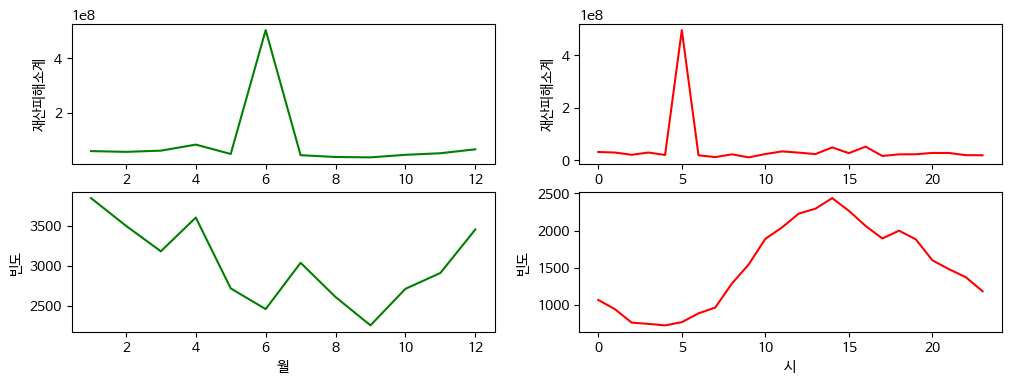

In [165]:
g1 = df.groupby('월')[['재산피해소계']].sum().dropna()
g2 = df.groupby('시')[['재산피해소계']].sum().dropna()
x11 = g1.index
x12 = g2.index
y11 = g1['재산피해소계']
y12 = g2['재산피해소계']

fig, axs = plt.subplots(2, 2, figsize = (12, 4))

axs[0][0].plot(x11, y11, color = 'green')
axs[0][1].plot(x12, y12,color = 'red')
axs[0][0].set_ylabel("재산피해소계")
axs[0][1].set_ylabel("재산피해소계")
axs[0][0].set_xlabel("월")
axs[0][1].set_xlabel("시")
x21 = df['월'].value_counts().sort_index()
x22 = df['시'].value_counts().sort_index()
axs[1][0].plot(x21, color = 'green')
axs[1][1].plot(x22, color = 'red')
axs[1][0].set_ylabel("빈도")
axs[1][1].set_ylabel("빈도")
axs[1][0].set_xlabel("월")
axs[1][1].set_xlabel("시")
plt.show()
#21년 6월 쿠팡화재의 재산피해가 커서 다른 정보의 가시성이 떨어집니다.

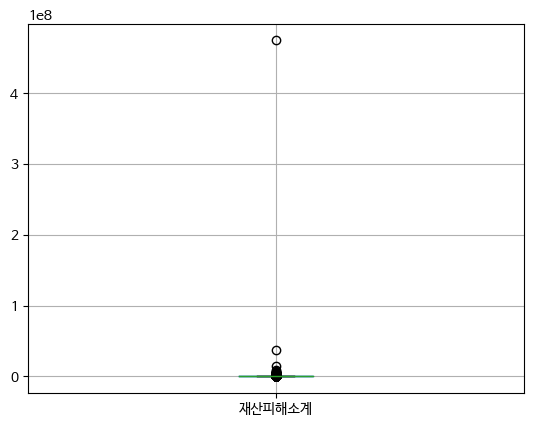

In [166]:
box = df.boxplot('재산피해소계')
box.plot()
plt.show()
#21년 6월 쿠팡화재의 재산피해가 커서 다른 정보의 가시성이 떨어집니다.

In [167]:
#일반적이지 않은 데이터를 제거해 주었습니다.
Q1 = df['재산피해소계'].quantile(0.25)
Q3 = df['재산피해소계'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[df['재산피해소계'] > Q3 + IQR*10000]
print(outliers)
df['재산피해소계'] = df['재산피해소계'].drop(outliers.index)

                  화재발생년월일   시도   시군구    화재유형 발화열원대분류       발화열원소분류 발화요인대분류  \
11617 2021-04-10 16:29:00  경기도  남양주시  건축,구조물    작동기기      기타(작동기기)      기타   
18196 2021-06-17 05:36:00  경기도   이천시  건축,구조물    작동기기  불꽃, 스파크, 정전기  전기적 요인   

         발화요인소분류 최초착화물대분류   최초착화물소분류  인명피해(명)소계  사망  부상     재산피해소계 장소대분류  \
11617         기타       식품        튀김유          0   0   0   37747126    주거   
18196  기타(전기적요인)    전기,전자  기타(전기,전자)          2   1   1  474323261  산업시설   

      장소중분류      장소소분류  월   시  계절  
11617  공동주택    주상복합아파트  4  16   봄  
18196  창고시설  창고, 물품저장소  6   5  여름  


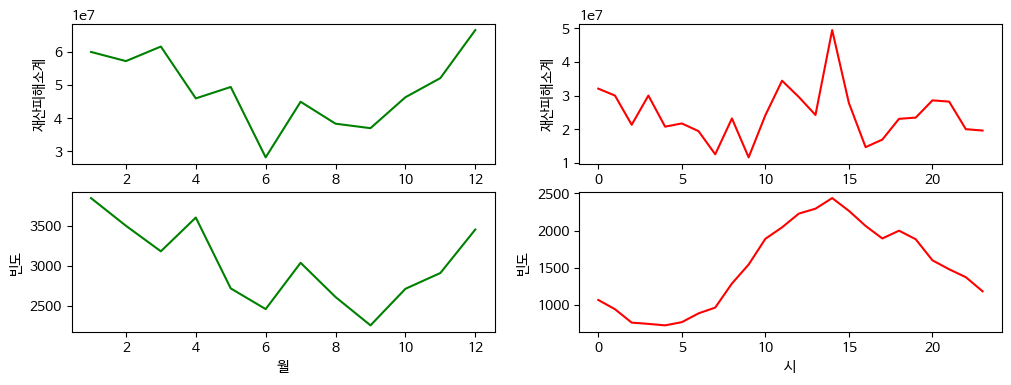

In [168]:
g1 = df.groupby('월')[['재산피해소계']].sum().dropna()
g2 = df.groupby('시')[['재산피해소계']].sum().dropna()
x11 = g1.index
x12 = g2.index
y11 = g1['재산피해소계']
y12 = g2['재산피해소계']

fig, axs = plt.subplots(2, 2, figsize = (12, 4))

axs[0][0].plot(x11, y11, color = 'green')
axs[0][1].plot(x12, y12,color = 'red')
axs[0][0].set_ylabel("재산피해소계")
axs[0][1].set_ylabel("재산피해소계")
axs[0][0].set_xlabel("월")
axs[0][1].set_xlabel("시")
x21 = df['월'].value_counts().sort_index()
x22 = df['시'].value_counts().sort_index()
axs[1][0].plot(x21, color = 'green')
axs[1][1].plot(x22, color = 'red')
axs[1][0].set_ylabel("빈도")
axs[1][1].set_ylabel("빈도")
axs[1][0].set_xlabel("월")
axs[1][1].set_xlabel("시")
plt.show()
#겨울과 낮에 빈도가 많아 재산피해가 크고 여름과 오전에는 빈도도 적어 피해가 작습니다.

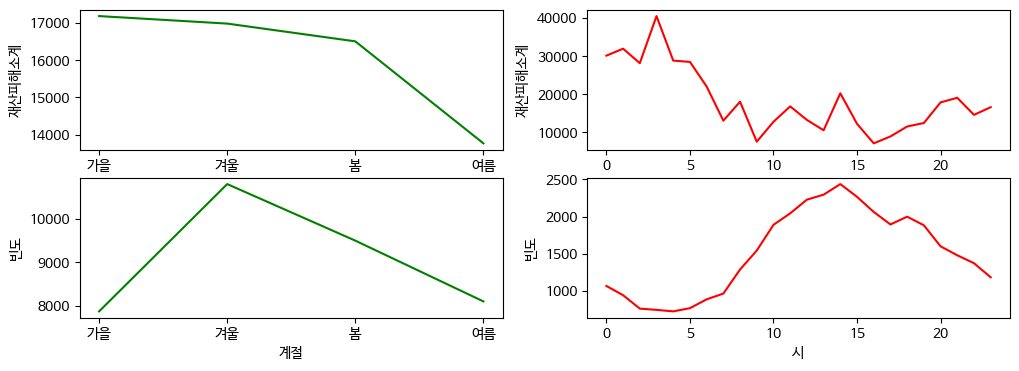

In [169]:
g1 = df.groupby('계절')[['재산피해소계']].mean().dropna()
g2 = df.groupby('시')[['재산피해소계']].mean().dropna()
x11 = g1.index
x12 = g2.index
y11 = g1['재산피해소계']
y12 = g2['재산피해소계']

fig, axs = plt.subplots(2, 2, figsize = (12, 4))

axs[0][0].plot(x11, y11, color = 'green')
axs[0][1].plot(x12, y12,color = 'red')
axs[0][0].set_ylabel("재산피해소계")
axs[0][1].set_ylabel("재산피해소계")
axs[0][0].set_xlabel("계절")
axs[0][1].set_xlabel("시")
x21 = df['계절'].value_counts().sort_index()
x22 = df['시'].value_counts().sort_index()
axs[1][0].plot(x21, color = 'green')
axs[1][1].plot(x22, color = 'red')
axs[1][0].set_ylabel("빈도")
axs[1][1].set_ylabel("빈도")
axs[1][0].set_xlabel("계절")
axs[1][1].set_xlabel("시")
plt.show()
#가을과 새벽에 빈도는 적지만 상대적으로 평균적인 피해가 크며, 낮에는 빈도는 높지만 평균 재산피해는 적은 편입니다.

In [ ]:
#결론은 겨울, 낮에 빈도가 많아 화재빈도를 줄이기위해 노력해야하고,
#가을, 새벽에는 빈도는 적지만 평균 피해가 크기떄문에 화재 발생시 가장 주의해야합니다.